In [260]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import poisson

In [261]:
font = {'family' : 'MS Reference Sans Serif',
        'size'   : 15}

matplotlib.rc('font', **font)

## Lab #1

In [262]:
f = open('lab2-exp1.tsv', "r")
lines = f.readlines()[11:]

In [263]:
voltage_lab1 = []
counts = []
for i in range(len(lines)):
    voltage_lab1.append(float((lines[i].split())[1]))
    counts.append(float((lines[i].split())[2]))

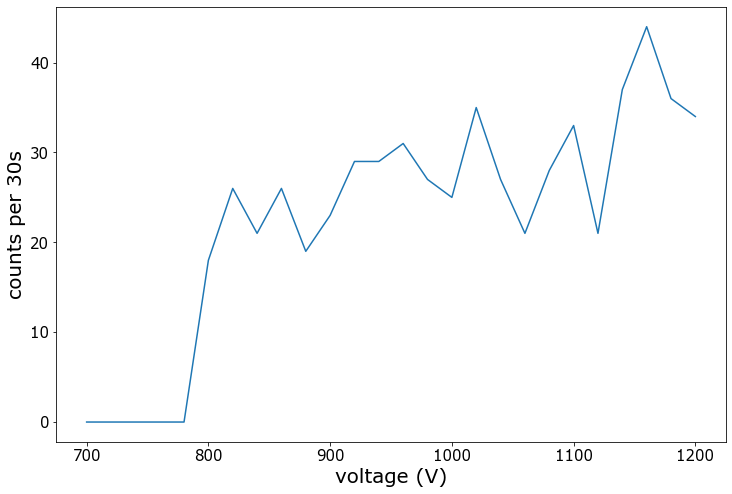

In [264]:
plt.figure(figsize = (12, 8))
plt.plot(voltage_lab1, counts)
plt.xlabel("voltage (V)", fontsize = 20)
plt.ylabel("counts per 30s", fontsize = 20)
plt.savefig('Figure 1.pdf', dpi=600, bbox_inches='tight')

## Lab #2

In [265]:
f = open('lab2-exp2_background.tsv', "r")
lines = f.readlines()[11:]

counts_lab2_bg = []
for i in range(len(lines)):
    counts_lab2_bg.append(float((lines[i].split())[2]))

In [266]:
f = open('lab2-exp2_cs137.tsv', "r")
lines = f.readlines()[11:]

counts_lab2 = []
for i in range(len(lines)):
    counts_lab2.append(float((lines[i].split())[2]))

In [267]:
print("The average background count per 5s is: {:.1f}".format(np.mean(counts_lab2_bg)))

The average background count per 5s is: 2.7


In [268]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

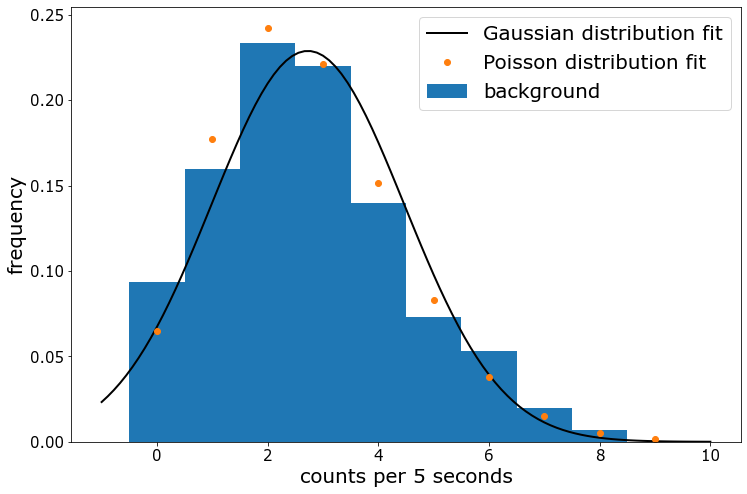

In [269]:
plt.figure(figsize = (12, 8))

bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(counts_lab2_bg, label = "background", density=True, bins=bins)
# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

mu, std = norm.fit(counts_lab2_bg)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label = "Gaussian distribution fit")
good_points = np.where(fit_function(x, *parameters) > 0.001)
plt.plot(x[good_points], fit_function(x, *parameters)[good_points],
         marker='o', linestyle='', label='Poisson distribution fit')

plt.xlabel("counts per 5 seconds", fontsize = 20)
plt.ylabel("frequency", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 2.pdf', dpi=600, bbox_inches='tight')

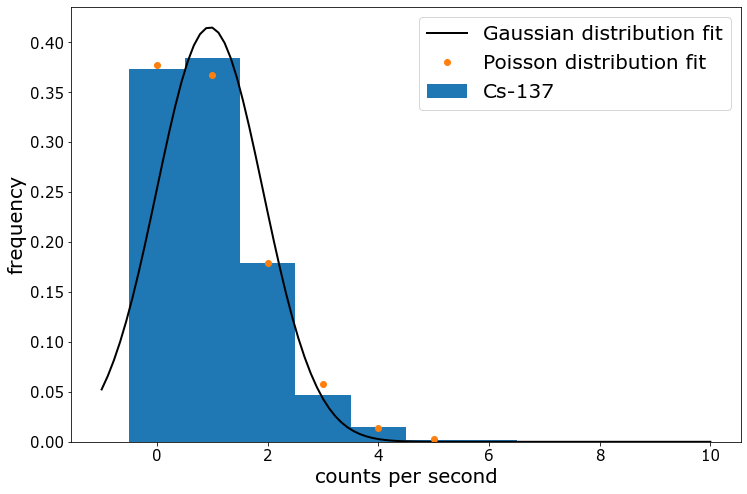

In [270]:
plt.figure(figsize = (12, 8))
entries, bin_edges, patches = plt.hist(counts_lab2, label = "Cs-137", density=True, bins=bins)
# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

mu, std = norm.fit(counts_lab2)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label = "Gaussian distribution fit")
good_points = np.where(fit_function(x, *parameters) > 0.001)
plt.plot(x[good_points], fit_function(x, *parameters)[good_points],
         marker='o', linestyle='', label='Poisson distribution fit')

plt.xlabel("counts per second", fontsize = 20)
plt.ylabel("frequency", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 3.pdf', dpi=600, bbox_inches='tight')

## Lab #3

In [271]:
f = open('lab2-exp3_background.tsv', "r")
lines = f.readlines()[11:]

counts_lab3_bg = []
for i in range(len(lines)):
    counts_lab3_bg.append(float((lines[i].split())[2]))

In [272]:
print("The average background count per 5 mins is: {:.0f}".format(np.mean(counts_lab3_bg)))

The average background count per 5 mins is: 133


In [273]:
f = open('lab2-exp3_sr90.tsv', "r")
lines = f.readlines()[11:]

counts_lab3 = []
for i in range(len(lines)):
    counts_lab3.append(float((lines[i].split())[2]))

In [274]:
print("The average Sr90 count per 5 mins is: {:.0f}".format(np.mean(counts_lab3)))
print("The average true Sr90 count per 5 mins is: {:.0f}".format(np.mean(counts_lab3) - np.mean(counts_lab3_bg)))

The average Sr90 count per 5 mins is: 11928
The average true Sr90 count per 5 mins is: 11795


## Lab #5

resolving time = dead time = 5 mirco seconds

In [275]:
f = open('lab2-exp5.tsv', "r")
lines = f.readlines()[11:]

counts_lab5 = []
for i in range(len(lines)):
    counts_lab5.append(float((lines[i].split())[2]))

In [276]:
counts_lab5

[25.0, 37.0, 3840.0, 2355.0]

## Lab #6

In [277]:
f = open('lab2-exp6_tl204.tsv', "r")
lines = f.readlines()[11:]

counts_lab6 = []
for i in range(len(lines)):
    counts_lab6.append(float((lines[i].split())[2]))

In [278]:
counts_lab6

[19.0, 8.0, 15.0, 16.0, 11.0, 8.0, 21.0, 15.0, 12.0, 9.0, 15.0]

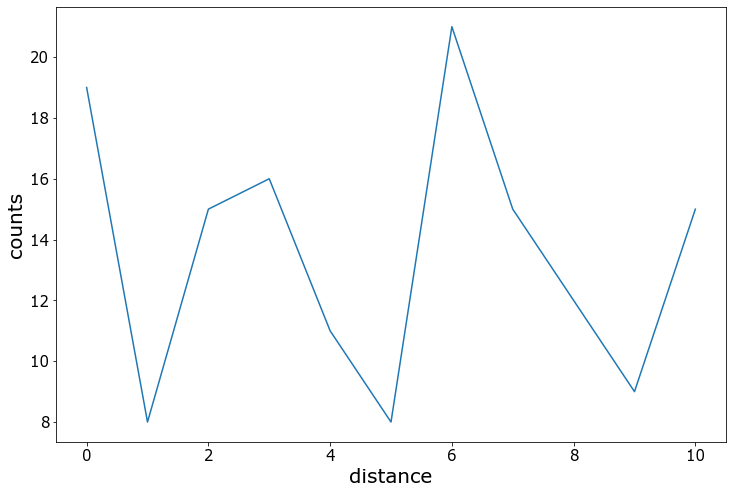

In [279]:
plt.figure(figsize = (12, 8))
plt.plot(counts_lab6)
plt.xlabel("distance", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.savefig('Figure 4.pdf', dpi=600, bbox_inches='tight')

We didn't see decrease in intensity with increasing distances. The number of counts are close to background level.

## Lab #7

In [280]:
f = open('lab2-exp7-sr90.tsv', "r")
lines = f.readlines()[11:]

counts_lab7 = []
for i in range(len(lines)):
    counts_lab7.append(float((lines[i].split())[2]))

In [281]:
counts_lab7

[29.0,
 2457.0,
 2741.0,
 3035.0,
 2690.0,
 2923.0,
 3378.0,
 3205.0,
 3028.0,
 2960.0,
 2744.0]

## Lab #8

In [282]:
f = open('lab2-exp8-tl204.tsv', "r")
lines = f.readlines()[11:]

counts_lab8 = []
for i in range(len(lines)):
    counts_lab8.append(float((lines[i].split())[2]))

In [283]:
distances = np.arange(2, 12)

def inverse_squared(x, m, c):
    return m/(x*x) + c

popt, pcov = curve_fit(inverse_squared, distances, counts_lab8[1:])

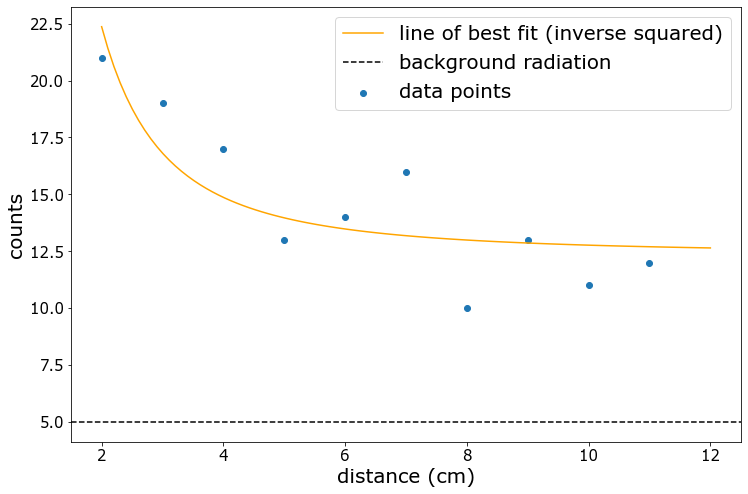

In [284]:
x_distances = np.linspace(2, 12, 100)

plt.figure(figsize = (12, 8))
plt.scatter(distances, counts_lab8[1:], label = "data points")
plt.plot(x_distances, inverse_squared(x_distances, *popt), color = "orange", label = "line of best fit (inverse squared)")
plt.axhline(y = 5, color = 'black', linestyle = '--', label = "background radiation")
plt.xlabel("distance (cm)", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 4.pdf', dpi=600, bbox_inches='tight')

## Lab #9

In [285]:
f = open('lab2-exp9-po210.tsv', "r")
lines = f.readlines()[11:]

counts_lab9 = []
for i in range(len(lines)):
    counts_lab9.append(float((lines[i].split())[2]))

In [286]:
a = np.array(counts_lab9[3:])

In [287]:
N = 3 # Window size

np.arange(a.size)//N # IDs for binning with bincount
avg_counts = np.bincount(np.arange(a.size)//N,a)/np.bincount(np.arange(a.size)//N)

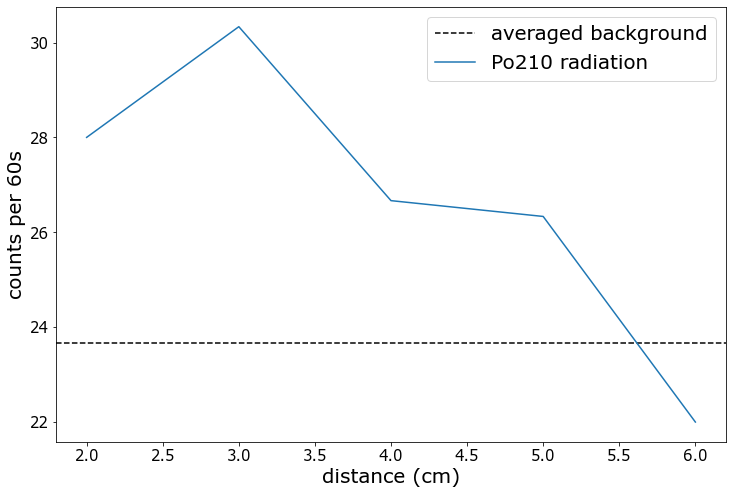

In [288]:
distances = np.arange(2, 7)

plt.figure(figsize = (12, 8))
plt.axhline(y = np.mean(counts_lab9[:3]), color = 'black', linestyle = '--', label = "averaged background")
plt.plot(distances, avg_counts, label = "Po210 radiation" )
plt.xlabel("distance (cm)", fontsize = 20)
plt.ylabel("counts per 60s", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 5.pdf', dpi=600, bbox_inches='tight')

The number of counts are close to background level. The sample has likely expired.

## Lab #12

In [297]:
f = open('lab2-exp12_co60.tsv', "r")
lines = f.readlines()[11:]

counts_lab12 = []
for i in range(len(lines)):
    counts_lab12.append(float((lines[i].split())[2]))

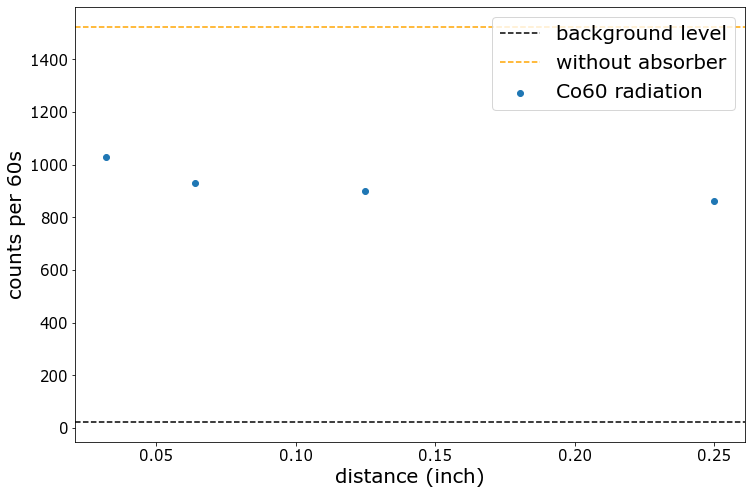

In [300]:
distances_inches = [0.25, 0.125, 0.064, 0.032]

plt.figure(figsize = (12, 8))
plt.axhline(y = counts_lab12[0], color = 'black', linestyle = '--', label = "background level")
plt.axhline(y = counts_lab12[1], color = 'orange', linestyle = '--', label = "without absorber")
plt.scatter(distances_inches, counts_lab12[2:], label = "Co60 radiation" )
plt.xlabel("distance (inch)", fontsize = 20)
plt.ylabel("counts per 60s", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 6.pdf', dpi=600, bbox_inches='tight')

## Lab #13

In [289]:
f = open('lab2-exp13_Ba-137m.tsv', "r")
lines = f.readlines()[11:]

counts_lab13 = []
for i in range(len(lines)):
    counts_lab13.append(float((lines[i].split())[2]))

In [290]:
counts_lab13[:1]

[15.0]

In [291]:
counts = [x - 15 for x in counts_lab13[1:]]

# log-linear fit
def linear(x, m, c):
    return x*m + c

times = np.linspace(0, 930, 31)

popt, pcov = curve_fit(linear, times, np.log(counts))

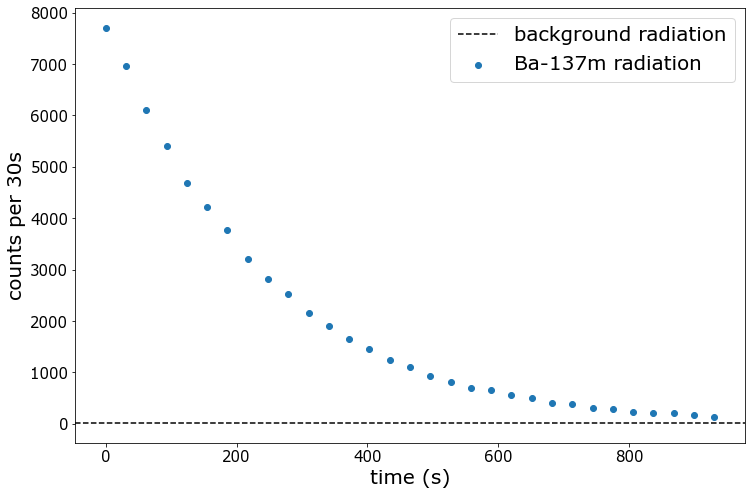

In [292]:
plt.figure(figsize = (12, 8))
plt.axhline(y = counts_lab13[:1], color = 'black', linestyle = '--', label = "background radiation")
plt.scatter(times, counts, label = "Ba-137m radiation" )
plt.xlabel("time (s)", fontsize = 20)
plt.ylabel("counts per 30s", fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('Figure 8.pdf', dpi=600, bbox_inches='tight')

In [293]:
Lambda = -popt[0]
half_life = np.log(2)/Lambda

In [294]:
half_life

159.1815501910182

uncertainty:

In [295]:
sigma = np.sqrt(np.diag(pcov))[0] * half_life/Lambda
sigma

1.0415670368270122

In [296]:
number_of_sigmas = (half_life - 153)/sigma
number_of_sigmas

5.934855820561899